In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import glob

In [14]:
glob.glob(r'C:\Users\Saikat\Desktop\pandas\Projects\S&P_resources\individual_stocks_5yr/*.csv')

['C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AD

In [15]:
import warnings

In [16]:
from warnings import filterwarnings

In [17]:
filterwarnings('ignore')

In [18]:
apple = pd.read_csv(r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')

In [19]:
file_list = [
    r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\GOOGL_data.csv',
    r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv',
]

In [20]:
files = pd.DataFrame()
for file in file_list:
    current = pd.read_csv(file)
    files = pd.concat([current,files], ignore_index = True)

In [21]:
files['date'] = pd.to_datetime(files['date'])
files.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

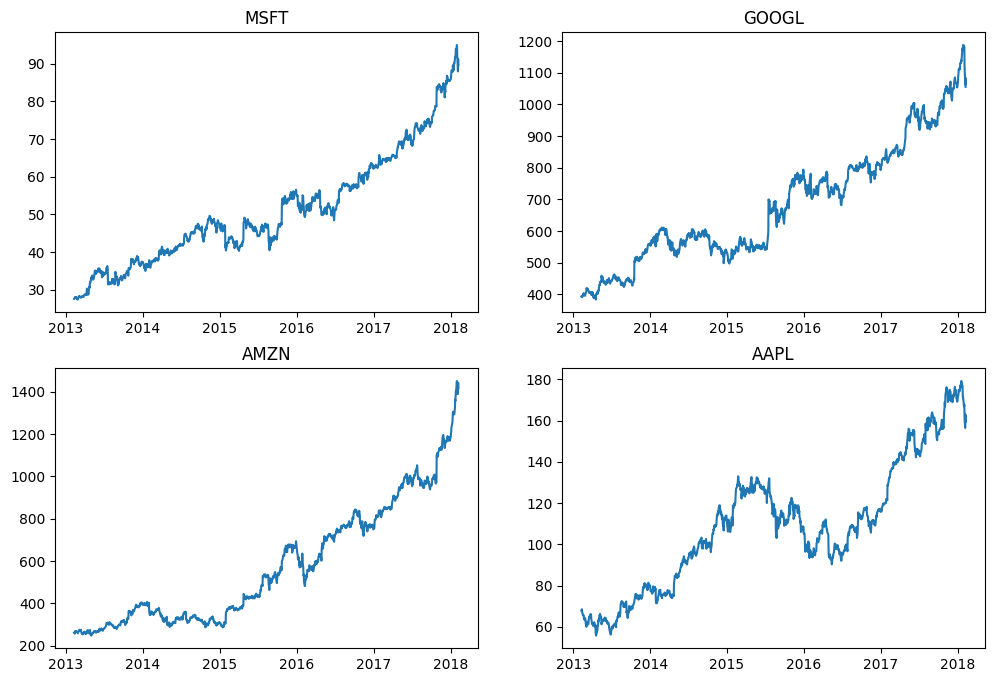

In [22]:
comp_names = files['Name'].unique()
plt.figure(figsize = (12,8))
for index, comp in enumerate(comp_names, 1):
    plt.subplot(2,2, index)
    comp_filter = files['Name'] == comp
    comp_name = files[comp_filter]
    plt.plot(comp_name['date'], comp_name['close'])
    plt.title(comp)

In [23]:
files.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [24]:
new_files = files.copy()

In [25]:
new_files.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [26]:
new_files['close'].rolling(window = 10).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5031    171.948
5032    170.152
5033    168.101
5034    166.700
5035    165.232
Name: close, Length: 5036, dtype: float64

In [27]:
ma_days = [10,20,30,40,50]

In [28]:
for ma in ma_days:
    new_files['close_'+str(ma)] = new_files['close'].rolling(window = ma).mean()

In [29]:
new_files.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_30,close_40,close_50
5031,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333,172.97175,172.8252
5032,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333,172.74325,172.6356
5033,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000,172.43025,172.3026
5034,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,171.946667,172.27300,172.0640
5035,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.431000,172.02725,171.7554


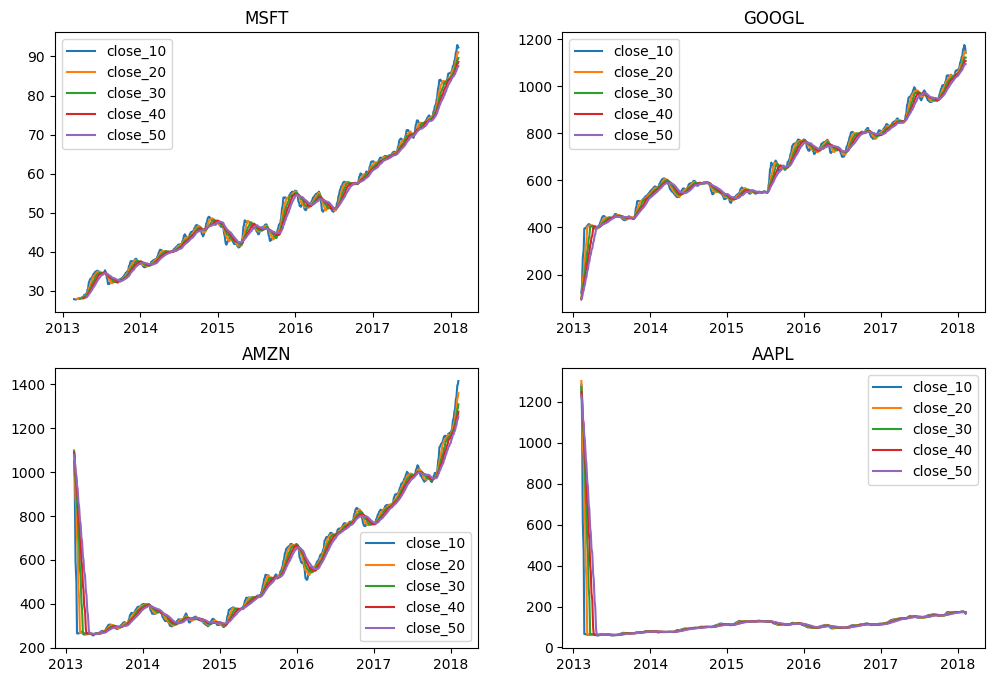

In [41]:
comp_names = new_files['Name'].unique()
plt.figure(figsize = (12,8))
for index, comp in enumerate(comp_names, 1):
    plt.subplot(2,2, index)
    comp_filter = new_files['Name'] == comp
    comp_name = new_files[comp_filter]
    plt.plot(comp_name['date'], comp_name[['close_10', 'close_20', 'close_30', 'close_40', 'close_50']])
    plt.title(comp)
    plt.legend(['close_10', 'close_20', 'close_30', 'close_40', 'close_50'])

In [48]:
files['daily_change'] = files['close'].pct_change() * 100
files.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,1.125227
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,0.071788
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,0.538020
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,0.035676


In [42]:
import plotly.express as px

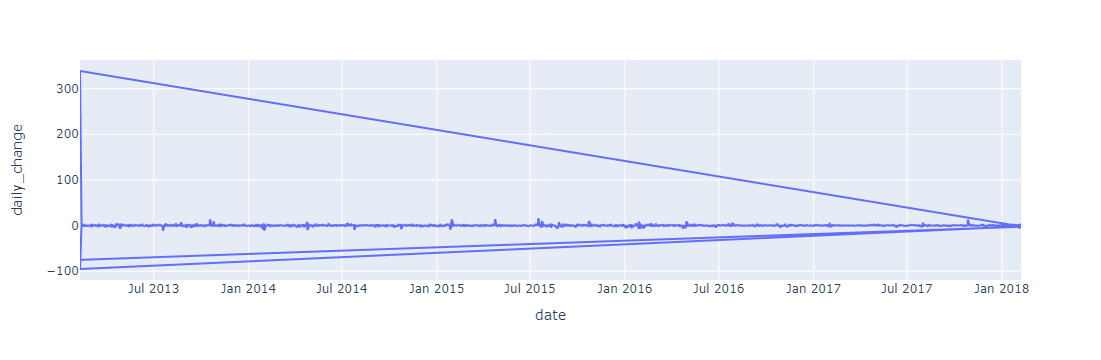

In [49]:
px.line(files, x = 'date', y = 'daily_change')
px.l

In [66]:
amzn = pd.read_csv(r'C:\\Users\\Saikat\\Desktop\\pandas\\Projects\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv', on_bad_lines = 'skip', parse_dates = ['date'], index_col = 'date')

In [67]:
amzn.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

<Axes: xlabel='date'>

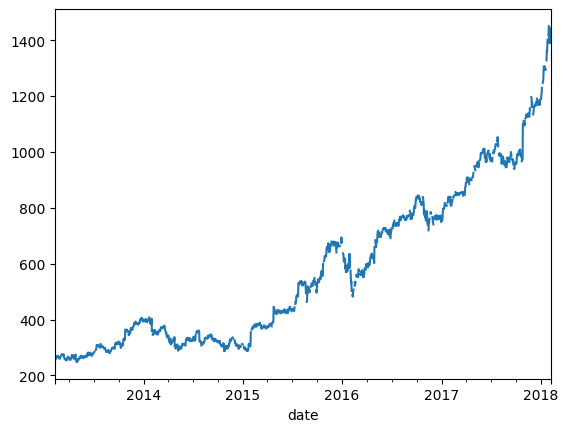

In [72]:
amzn['close'].resample("D").mean().plot()

In [74]:
file_list

['C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [75]:
apple = pd.read_csv('C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv')
amazon = pd.read_csv('C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv')
google = pd.read_csv('C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOGL_data.csv')
microsoft = pd.read_csv('C:\\\\Users\\\\Saikat\\\\Desktop\\\\pandas\\\\Projects\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv')

In [89]:
all_close_data = pd.DataFrame()
all_close_data['apple_close'] = apple['close']
all_close_data['amazon_close'] = amazon['close']
all_close_data['google_close'] = google['close']
all_close_data['microsoft_close'] = microsoft['close']

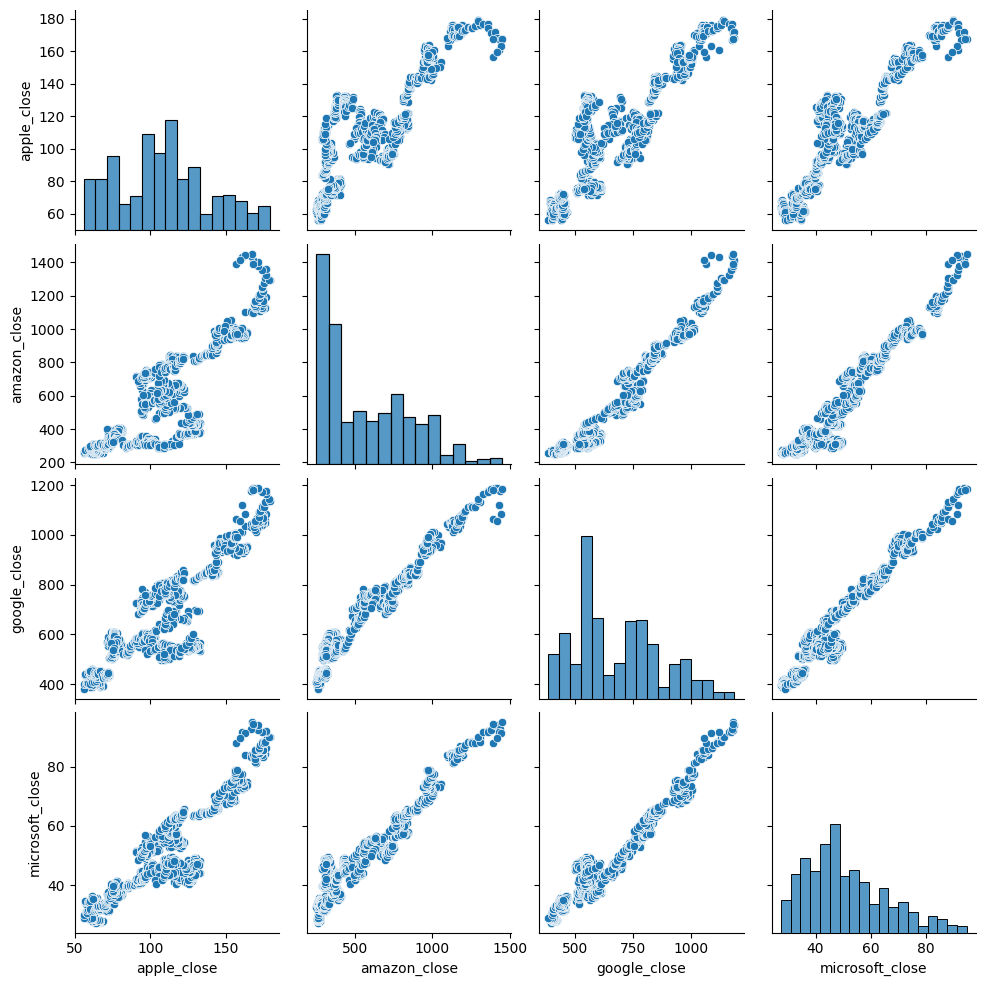

In [79]:
sns.pairplot(all_close_data)

In [80]:
all_close_data

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [84]:
apple['close'].pct_change()
all_close_data.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

In [90]:
for col in all_close_data.columns:
    all_close_data[col + '_pct_change'] = all_close_data[col].pct_change()

In [91]:
all_close_data.head()

,apple_close,amazon_close,google_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,0.010422,-0.018095,-0.003756,0.011252
2,66.8428,258.70,390.7403,27.88,-0.025067,0.005793,-0.002198,0.000718
3,66.7156,269.47,391.8214,28.03,-0.001903,0.041631,0.002767,0.005380
4,66.6556,269.24,394.3039,28.04,-0.000899,-0.000854,0.006336,0.000357


In [95]:
all_pct_change = all_close_data[['apple_close_pct_change', 'amazon_close_pct_change','google_close_pct_change', 'microsoft_close_pct_change']]

In [96]:
all_pct_change.head()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,0.010422,-0.018095,-0.003756,0.011252
2,-0.025067,0.005793,-0.002198,0.000718
3,-0.001903,0.041631,0.002767,0.005380
4,-0.000899,-0.000854,0.006336,0.000357


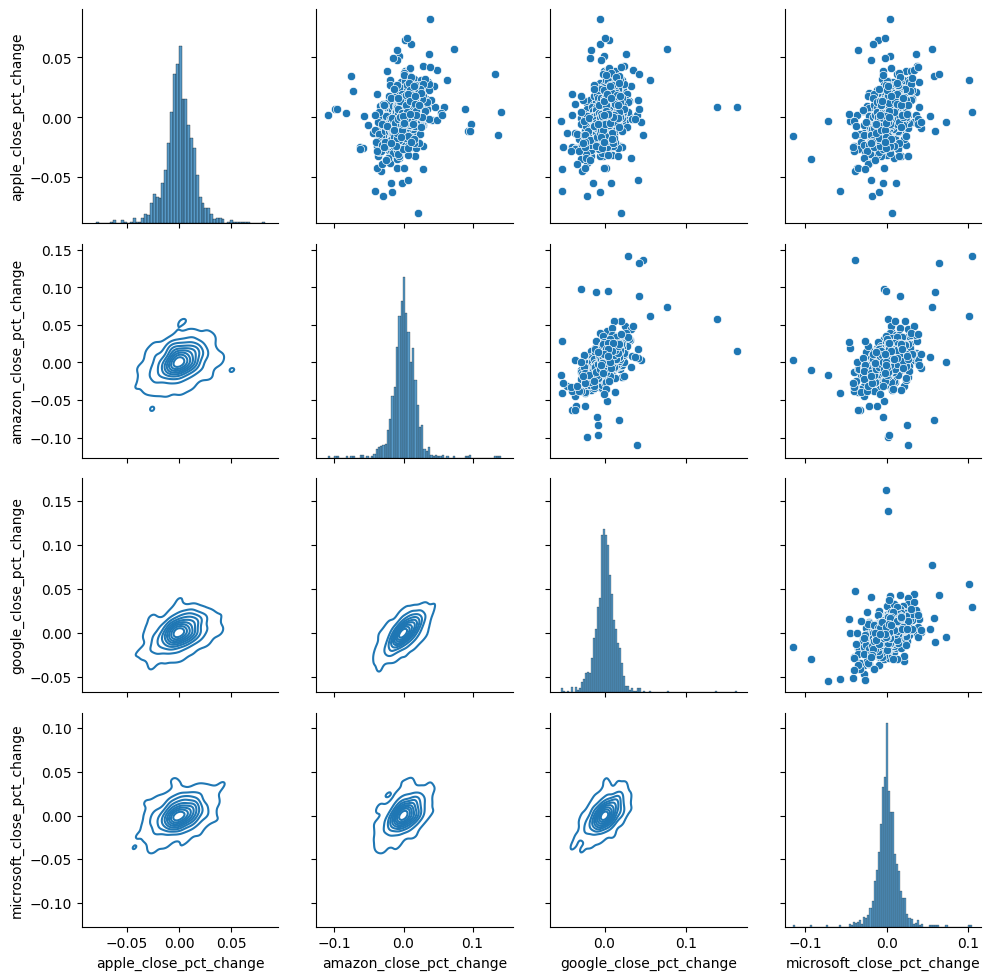

In [99]:
grid = sns.PairGrid(all_pct_change)
grid.map_diag(sns.histplot)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot)